## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head()
combine_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how="outer" )
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
len(combine_data['Mouse ID'].unique())

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_data[combine_data.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 

combine_data.loc[combine_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_data_clean = combine_data.loc[combine_data['Mouse ID'] != 'g989']
combine_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice in the clean DataFrame.
len(combine_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

combine_data_grp = combine_data_clean.groupby(['Drug Regimen']) 

drug_mean = combine_data_grp["Tumor Volume (mm3)"].mean()
drug_med = combine_data_grp["Tumor Volume (mm3)"].median()
drug_var = combine_data_grp["Tumor Volume (mm3)"].var()
drug_std = combine_data_grp["Tumor Volume (mm3)"].std()
drug_sem = combine_data_grp["Tumor Volume (mm3)"].sem()

stat_summary = pd.DataFrame({"Mean":drug_mean, "Median":drug_med, "Variance":drug_var, "STDEV":drug_std, "SEM":drug_sem})
stat_summary

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
combine_data_grp = combine_data_clean.groupby(['Drug Regimen']) #best practice - keep groupby in single statement
combine_data_agg = combine_data_grp.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', st.sem]})
combine_data_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

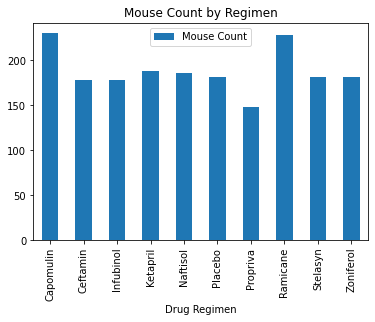

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

grp_time = combine_data_clean.groupby(['Drug Regimen'])
plot_data = grp_time.agg({'Mouse ID':['count']})


plot_data.columns = ['Mouse Count']
plot_data.plot(kind='bar', title="Mouse Count by Regimen")

<BarContainer object of 10 artists>

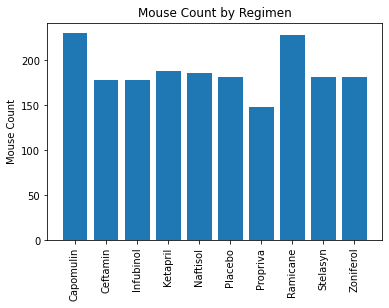

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plot_data_mat = plot_data.reset_index()

 # define and render bar graph
drug = plot_data_mat['Drug Regimen']
mice = plot_data_mat['Mouse Count']
plt.xticks(rotation='vertical')
plt.title("Mouse Count by Regimen")
plt.ylabel("Mouse Count")
plt.bar(drug, mice)

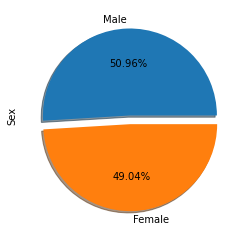

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_sex = combine_data_clean['Sex'].value_counts()
explode = (0,0.1)
mouse_sex.plot(kind="pie", shadow=True, autopct="%1.2f%%", explode=explode)

Text(0.5, 1.0, 'Mouse Sex')

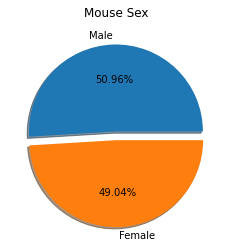

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_sex, shadow=True, autopct="%1.2f%%", explode=explode, labels=('Male', 'Female'))
plt.title("Mouse Sex")

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_eval = combine_data_clean.loc[combine_data_clean['Drug Regimen'].isin(drug_list)]
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_df.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = tumor_volume_df.reset_index()
tumor_vol_final_df = pd.merge(tumor_volume_df, combine_data_clean, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
    
    # add subset 
    tumor_volumes.append(tumor_vol_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



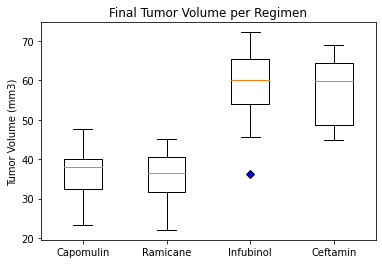

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_diamond = dict(markerfacecolor='b', marker='D')

# plots
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=blue_diamond)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

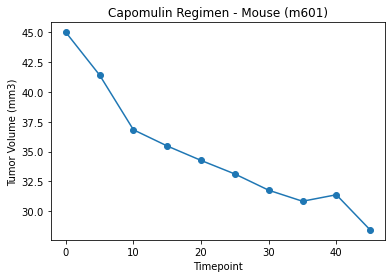

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
find_mouse = combine_data_clean[['Timepoint', 'Tumor Volume (mm3)']].loc[(combine_data_clean['Drug Regimen'] == 'Capomulin') & (combine_data_clean['Mouse ID']=='m601')]
find_mouse

plt.plot(find_mouse['Timepoint'], find_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen - Mouse (m601)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")


Text(0, 0.5, 'Tumor Volume')

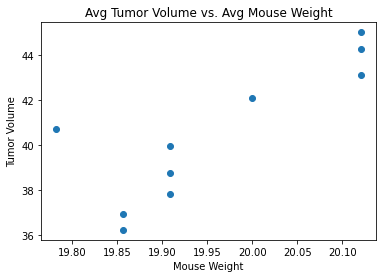

In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg_tumor_wgt = combine_data_clean.loc[combine_data_clean['Drug Regimen'] == 'Capomulin'].groupby(combine_data_clean['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
cap_avg_tumor_wgt.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')


## Correlation and Regression

The correlation between Average Tumor Volume and Mouse Weight is 0.82
The linear regression equation is y = 20.29x + -364.52


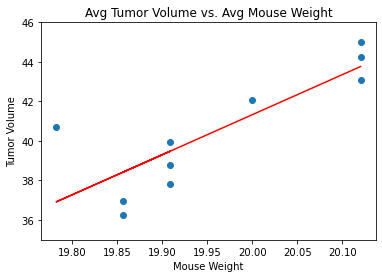

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(atv,amw)
print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')

#Lin regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(amw,atv)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')


atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)


reg_values = amw * slope + intercept
plt.plot(amw, reg_values, "r-")
plt.show()